# Cours : Algorithme des $k$-moyennes

Nous allons classifier un ensemble de points issus de trois distributions gaussiennes (de paramètres différents), avec la méthode des $k$-moyennes:

[[5.013321421550197, 4.462180941798396], [5.156754142923645, -0.13841848387671263]]


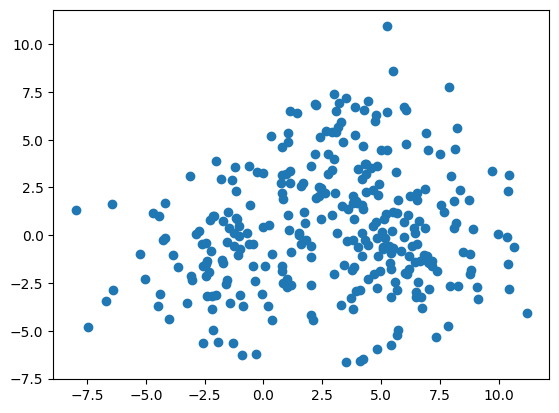

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

def points(n):
    tX0 = np.random.multivariate_normal([4, 3], 5*np.eye(2), n) # points de classe 0
    tX1 = np.random.multivariate_normal([-2, -1], 5*np.eye(2), n) # points de classe 1
    tX2 = np.random.multivariate_normal([6, -1], 5*np.eye(2), n) # points de classe 2
    X = np.vstack((tX0, tX1, tX2))
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

X, y = points(100)
plt.scatter(X[:,0], X[:,1]);

k=3

X=X.tolist()
print(X[:2])

In [2]:
def d(x, y):
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return s**.5

d([2.8189720581437347, 0.6007692231345159], [5.935110287416922, -2.1463969790705955])

4.1541833862356015

In [3]:
def centre(classe):
    centre = [0]*len(X[0])
    print(classe)
    for i in range(len(classe)):
        for j in range(len(centre)):
            centre[j] += classe[i][j]
    if len(classe) != 0:
        for j in range(len(centre)):
            centre[j] /= len(classe)
    return centre

centre([[2.8189720581437347, 0.6007692231345159], [5.935110287416922, -2.1463969790705955]])

[[2.8189720581437347, 0.6007692231345159], [5.935110287416922, -2.1463969790705955]]


[4.377041172780329, -0.7728138779680398]

In [4]:
def calculer_centres(classes):
    centres = []
    for c in classes:
        centres.append(centre(c))
    return centres

centres = calculer_centres([X[:2],X[2:4]])
print(centres)

[[5.013321421550197, 4.462180941798396], [5.156754142923645, -0.13841848387671263]]
[[2.917146155919705, 3.391325257502707], [2.4198667620568344, 5.1635464369494155]]
[[5.08503778223692, 2.1618812289608416], [2.6685064589882694, 4.277435847226061]]


In [5]:
def plus_proche(x,centres):
    L = [d(x,centres[i]) for i in range(len(centres))]
    min_i=0
    for i in range(len(L)):
        if L[min_i] > L[i]:
            min_i = i
    return(min_i)

plus_proche(X[0],centres)

0

In [6]:
def calculer_classes(X,centres):
    classes = [[] for _ in range(len(centres))]
    for x in X:
        classes[plus_proche(x,centres)].append(x)
    return classes

calculer_classes(X[:10],centres)

[[[5.013321421550197, 4.462180941798396],
  [5.156754142923645, -0.13841848387671263],
  [7.88182092451531, 7.782009065985634],
  [4.9071814236564855, 2.697837589646987],
  [4.2534519225379785, 1.3787971657125655],
  [3.9912541230274217, 1.665135765186926]],
 [[2.917146155919705, 3.391325257502707],
  [2.4198667620568344, 5.1635464369494155],
  [2.0193965576704063, 3.627557052805132],
  [5.2622981852285715, 6.468088583688386]]]

In [7]:
def kmeans(X, centres):
    classes = calculer_classes(X, centres)
    nouveaux_centres = calculer_centres(classes)
    for i in range(len(centres)):
        if not np.array_equal(nouveaux_centres[i], centres[i]):
            return kmeans(X, nouveaux_centres)
    return classes

In [8]:
def heuristique_centres(X,k):
    centres = [X[rd.randint(0,len(X)-1)]]
    for k in range(k-1):        
        max_x=X[0]
        maxi=0
        for x in X:
            dist=0
            for c in centres:
                dist+= d(x,c)
            if dist>maxi:
                maxi=dist
                max_x=x
        centres.append(max_x)
    return centres

heuristique_centres(X,k)

[[4.854165894350213, -1.1134309981788897],
 [-7.982303530858391, 1.3336644544110103],
 [5.2692430088675515, 10.924927685824908]]

In [9]:
def centres_aleatoires(k):
    np.random.seed(1)
    return np.random.rand(k, len(X[0])).tolist()

In [10]:
res = kmeans(X,centres_aleatoires(3))

[[5.013321421550197, 4.462180941798396], [5.156754142923645, -0.13841848387671263], [2.917146155919705, 3.391325257502707], [2.4198667620568344, 5.1635464369494155], [7.88182092451531, 7.782009065985634], [4.9071814236564855, 2.697837589646987], [2.0193965576704063, 3.627557052805132], [4.2534519225379785, 1.3787971657125655], [5.2622981852285715, 6.468088583688386], [3.9912541230274217, 1.665135765186926], [2.8937054998054954, 1.0700729446452828], [4.859573194725694, 2.0968778264690666], [4.262513411078205, 6.556400519948219], [3.51982472502652, 7.198476495986688], [5.242049829364275, 4.480045913367241], [4.750745273471597, 5.952864804963927], [2.900495329276359, 5.425396324465405], [3.889140854149593, 6.7153917388500854], [4.662901600358552, 2.3842806565357972], [6.463648283700997, 0.11225671292310135], [3.1075247414476657, 0.12924748516889295], [4.80133465935195, 0.6887361196406485], [0.7764803536259097, 3.1310071165052578], [4.427068480842595, 7.022630049005353], [0.315439655489247

[[0.7708633638135329, 1.8719800381236427], [-0.1545737498647375, 5.764146803432626], [-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [-4.765688228146709, 0.9584353795643539], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-3.9259619328279634, 0.5087008366409018], [-2.77141485327454, -1.5161733575595002], [-8.245527927262675, 3.3324461356100743], [-1.7002591202426096, 1.6878763845626845], [-1.363283867676861, -0.4131049500634125], [-1.381728758686162, -2.6396451522802193], [-0.13063661783433544,

[[2.8189720581437347, 0.6007692231345159], [7.901517712729385, 1.2978896246566045], [4.713393106263758, 2.4423908888578643], [7.269372737674545, -1.6066146696514014], [3.2790532147103795, 2.141228355906609], [6.535185543874066, 0.5405683584274343], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.

[[0.7708633638135329, 1.8719800381236427], [-0.1545737498647375, 5.764146803432626], [-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [-4.765688228146709, 0.9584353795643539], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-2.77141485327454, -1.5161733575595002], [-8.245527927262675, 3.3324461356100743], [-1.0395503527977943, -2.357289680608789], [-1.7002591202426096, 1.6878763845626845], [-1.363283867676861, -

[[2.8189720581437347, 0.6007692231345159], [7.901517712729385, 1.2978896246566045], [4.713393106263758, 2.4423908888578643], [7.269372737674545, -1.6066146696514014], [3.2790532147103795, 2.141228355906609], [6.535185543874066, 0.5405683584274343], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.

[[0.7708633638135329, 1.8719800381236427], [-0.1545737498647375, 5.764146803432626], [-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262675, 3.3324461356100743], [-1.1808567131539882

[[2.8189720581437347, 0.6007692231345159], [7.901517712729385, 1.2978896246566045], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [6.535185543874066, 0.5405683584274343], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.

[[0.7708633638135329, 1.8719800381236427], [-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262675, 3.3324461356100743], [-1.1808567131539882, -3.335772866520311], [-1.039550352797794

[[2.8189720581437347, 0.6007692231345159], [7.901517712729385, 1.2978896246566045], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [6.535185543874066, 0.5405683584274343], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.

[[0.7708633638135329, 1.8719800381236427], [-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.2455279272626

[[2.8189720581437347, 0.6007692231345159], [7.901517712729385, 1.2978896246566045], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

/tmp/ipykernel_15710/2216540403.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


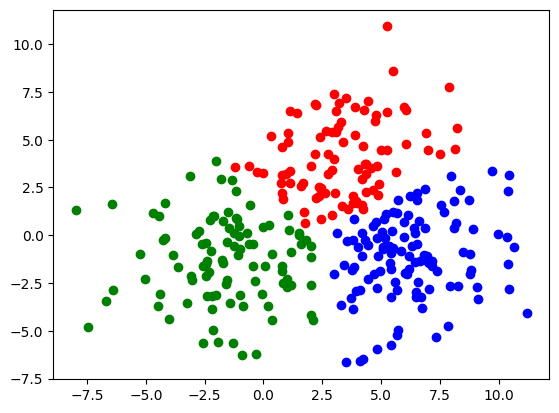

In [11]:
xs=[]
ys=[]
for data in res:
    xs.append([data[j][0] for j in range(len(data))])
    ys.append([data[j][1] for j in range(len(data))])

plt.clf()
f = plt.figure(1)
plt.scatter(xs[0], ys[0], c='r')
plt.scatter(xs[1], ys[1], c='g')
plt.scatter(xs[2], ys[2], c='b')
f.show()

In [12]:
res = kmeans(X,heuristique_centres(X,k))

[[5.013321421550197, 4.462180941798396], [5.156754142923645, -0.13841848387671263], [2.917146155919705, 3.391325257502707], [2.4198667620568344, 5.1635464369494155], [7.88182092451531, 7.782009065985634], [4.9071814236564855, 2.697837589646987], [2.0193965576704063, 3.627557052805132], [4.2534519225379785, 1.3787971657125655], [5.2622981852285715, 6.468088583688386], [3.9912541230274217, 1.665135765186926], [2.8937054998054954, 1.0700729446452828], [4.859573194725694, 2.0968778264690666], [4.262513411078205, 6.556400519948219], [3.51982472502652, 7.198476495986688], [5.242049829364275, 4.480045913367241], [4.750745273471597, 5.952864804963927], [2.900495329276359, 5.425396324465405], [3.889140854149593, 6.7153917388500854], [4.662901600358552, 2.3842806565357972], [3.1075247414476657, 0.12924748516889295], [4.80133465935195, 0.6887361196406485], [0.7764803536259097, 3.1310071165052578], [4.427068480842595, 7.022630049005353], [0.3154396554892478, 5.180696989935665], [4.186376536832257,

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [2.0484791436212646, -3.919694158890705], [-2.771414853274

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [2.0484791436212646, -3.919694158890705], [-2.771414853274

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

[[2.8189720581437347, 0.6007692231345159], [4.713393106263758, 2.4423908888578643], [3.2790532147103795, 2.141228355906609], [3.614438806678783, 1.037048902907393], [4.094392807241024, 4.303214436189647], [1.5389407024120203, 5.559680030657122], [6.01601813912851, 4.123611500093395], [6.014375140490326, 1.4711380287757878], [3.725209101970023, 0.9075559337302015], [3.400984043594352, 4.185910875865213], [2.453399541773604, 2.112832143637246], [2.463435130250498, 1.1100627306425457], [2.4990480218151547, 2.9716810959095663], [1.5016181084875293, 3.524169435312067], [7.7114304972198155, 4.659261185357692], [3.5710426644182087, 1.0152012975085867], [2.3293032652203705, 6.784443536730327], [4.11360959346334, 1.5756344328994951], [4.426900001673773, 7.69631325525979], [4.26868358585409, 4.38010810923005], [4.671201240249092, 2.2123453981766263], [1.4452516436919285, 2.2188459252399664], [3.5328982940662907, 4.311729332661249], [5.8760239454182335, 5.08200754778629], [4.638592672780865, 4.97

[[-3.257353167876004, 3.3712402634441343], [-4.978334469076698, -4.937019308257924], [-5.691124962287189, -2.9913428239306117], [-4.502418105846322, 3.3739253980346087], [-2.730075072322382, -4.002314336791137], [0.49183608904818454, -2.3115073976360088], [-4.765688228146709, 0.9584353795643539], [-0.6061197985692914, -1.9725927103557135], [1.1473551215894577, -0.7113200917642102], [1.4855951525293154, -0.7553681338709693], [-4.727431386819607, 4.476954801258111], [-3.220388139972411, -1.4446149779203559], [-3.5661386683431466, -1.4548038141308643], [-1.457374633679227, -0.548694000126785], [-0.5219137024228613, 3.0073875817036413], [-2.269366971399506, -3.7573417889227447], [-4.643743701905738, -2.488672359020868], [-5.743615633481093, 0.8448227709102898], [-3.1140393955915076, -1.6953835514664717], [-2.0042294842040507, -4.122938208160005], [-3.9259619328279634, 0.5087008366409018], [-0.6169044568182154, -1.9909625627664522], [-2.77141485327454, -1.5161733575595002], [-8.245527927262

/tmp/ipykernel_15710/3787545215.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  g.show()


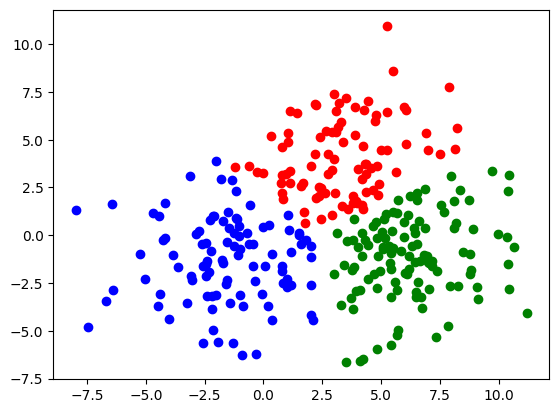

In [14]:
xs=[]
ys=[]
for data in res:
    xs.append([data[j][0] for j in range(len(data))])
    ys.append([data[j][1] for j in range(len(data))])

g = plt.figure(2)
plt.scatter(xs[0], ys[0], c='r')
plt.scatter(xs[1], ys[1], c='g')
plt.scatter(xs[2], ys[2], c='b')
g.show()